## **NYC Public School Test Result Scores Dataset Exploration**

### by Ellie Chong

![New York City schoolbus](schoolbus.jpg)

Photo by [Jannis Lucas](https://unsplash.com/@jannis_lucas) on [Unsplash](https://unsplash.com).
<br>

Every year, American high school students take SATs, which are standardized tests intended to measure literacy, numeracy, and writing skills. There are three sections - reading, math, and writing, each with a **maximum score of 800 points**. These tests are extremely important for students and colleges, as they play a pivotal role in the admissions process.

Analyzing the performance of schools is important for a variety of stakeholders, including policy and education professionals, researchers, government, and even parents considering which school their children should attend. 

You have been provided with a dataset called `schools.csv`, which is previewed below.

You have been tasked with answering three key questions about New York City (NYC) public school SAT performance.

In [152]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [153]:
schools = pd.read_csv("schools.csv")
schools

,school_name,borough,building_code,average_math,average_reading,average_writing,percent_tested
0,"New Explorations into Science, Technology and ...",Manhattan,M022,657,601,601,NaN
1,Essex Street Academy,Manhattan,M445,395,411,387,78.9
2,Lower Manhattan Arts Academy,Manhattan,M445,418,428,415,65.1
3,High School for Dual Language and Asian Studies,Manhattan,M445,613,453,463,95.9
4,Henry Street School for International Studies,Manhattan,M056,410,406,381,59.7
...,...,...,...,...,...,...,...
370,"Queens High School for Information, Research, ...",Queens,Q465,372,362,352,44.6
371,Rockaway Park High School for Environmental Su...,Queens,Q410,357,381,376,38.5
372,Channel View School for Research,Queens,Q410,427,430,423,76.6
373,Rockaway Collegiate High School,Queens,Q410,399,403,405,46.5


In [154]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_name      375 non-null    object 
 1   borough          375 non-null    object 
 2   building_code    375 non-null    object 
 3   average_math     375 non-null    int64  
 4   average_reading  375 non-null    int64  
 5   average_writing  375 non-null    int64  
 6   percent_tested   355 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 20.6+ KB


In [155]:
schools.shape

(375, 7)

This dataset contains 375 schools with 7 columns.

Here, I am using bar plot to view missing values.

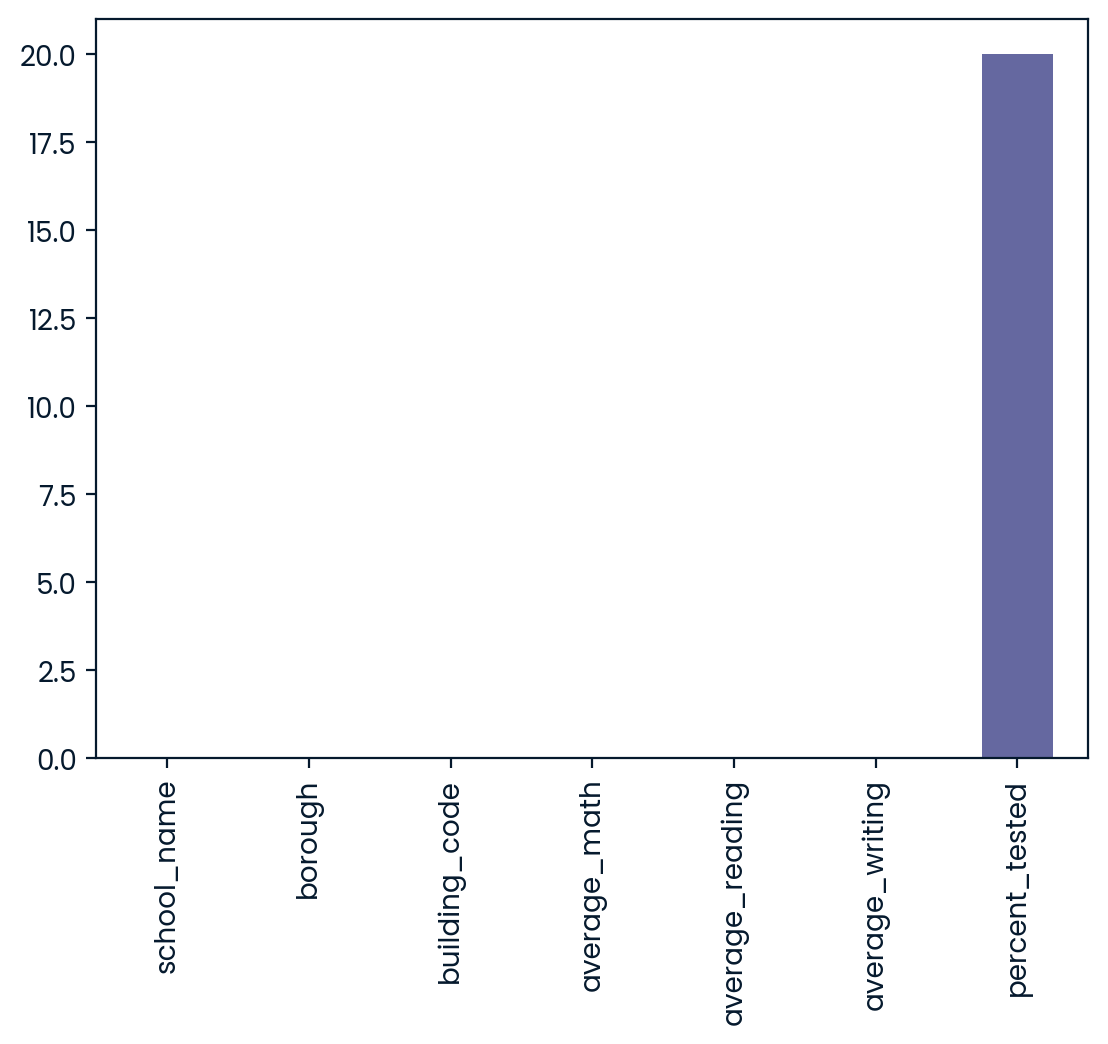

In [156]:
schools.isna().sum().plot(kind="bar")
plt.show()

In this small project, I am interested in solving the question **"Which NYC schools have the best math results?".**

According to the instructions, the best math scores are defined as those that are at least 80% of the maximum possible math score of 800, which equals 640 or higher.

I am creating a threshold for best math scores(80% of 800)

In [157]:
math_threshold = 0.8 * 800

I created a new dataframe called best_math_schools, which shows two columns school_name and average_math. Schools are sorted by average math scores from highest to lowest.

In [158]:
# Filter schools that have an average math score of at least 640
best_math_schools = schools[schools["average_math"] >= math_threshold][["school_name", "average_math"]].sort_values("average_math", ascending=False)
best_math_schools

,school_name,average_math
88,Stuyvesant High School,754
170,Bronx High School of Science,714
93,Staten Island Technical High School,711
365,Queens High School for the Sciences at York Co...,701
68,"High School for Mathematics, Science, and Engi...",683
280,Brooklyn Technical High School,682
333,Townsend Harris High School,680
174,High School of American Studies at Lehman College,669
0,"New Explorations into Science, Technology and ...",657
45,Eleanor Roosevelt High School,641


The table above displays the top 10 NYC schools with the highest math scores, ranked in descending order. 

Second, I am interested in solving the question **What are the top 10 performing schools based on the combined SAT scores?**

In [159]:
schools["total_SAT"] = schools["average_math"] + schools["average_reading"] + schools["average_writing"]

I created a new column called "total_SAT" in the schools dataframe, which contains the sum of three existing columns.

In [160]:
top_10_schools = schools[["school_name", "total_SAT"]].sort_values("total_SAT", ascending=False).head(10)

The table above shows the top 10 performing schools based on the combined SAT scores.

Third, I am interested in solving the question **Which single borough has the largest standard deviation in the combined SAT score?**

In [161]:
boroughs = schools.groupby("borough")["total_SAT"].agg(["count", "mean", "std"]).round(2)
boroughs

,count,mean,std
borough,,,
Bronx,98,1202.72,150.39
Brooklyn,109,1230.26,154.87
Manhattan,89,1340.13,230.29
Queens,69,1345.48,195.25
Staten Island,10,1439.00,222.30


In [162]:
# filter for largest std and make borough a column
largest_std_dev = boroughs[boroughs["std"] == boroughs["std"].max()]
largest_std_dev

,count,mean,std
borough,,,
Manhattan,89,1340.13,230.29


In [163]:
# rename columns for more readable columns
largest_std_dev = largest_std_dev.rename(columns={"count": "num_schools", "mean": "average_SAT", "std": "std_SAT"})
largest_std_dev

,num_schools,average_SAT,std_SAT
borough,,,
Manhattan,89,1340.13,230.29


From the table, Manhattan has the largest standard deviation in the combined SAT score.